https://www.kaggle.com/sonalisingh1411/linear-regression-using-weight-height

In [ ]:
#Import Library
import numpy as np
import pandas as pd
import seaborn as sns
import pandas_profiling
import matplotlib.pyplot as plt


In [ ]:
#Load dataset
Data = pd.read_csv('https://raw.githubusercontent.com/reddyprasade/Data-Sets-For-Machine-Learnig-and-Data-Science/master/DataSets/height-weight.csv')
Data.head()

,73.84701702,241.8935632
0,68.781904,162.310473
1,74.110105,212.740856
2,71.730978,220.042470
3,69.881796,206.349801
4,67.253016,152.212156


In [ ]:
Data.columns=['Height','Weight']

In [ ]:
#cek data
Data.tail()

,Height,Weight
4994,68.860062,177.131052
4995,68.973423,159.285228
4996,67.013795,199.195400
4997,71.557718,185.905910
4998,70.351880,198.903012


In [ ]:
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
Height,4999.0,69.025382,2.862837,58.406905,67.174643,69.026501,70.985742,78.998742
Weight,4999.0,187.009644,19.767898,112.902939,173.887432,187.028748,200.356545,269.989698


In [ ]:
#detect missing value
Data.isna().any()

Height    False
Weight    False
dtype: bool

In [ ]:
Data.isnull().any()

Height    False
Weight    False
dtype: bool

In [ ]:
pip uninstall pandas-profiling 

Found existing installation: pandas-profiling 3.1.0
Uninstalling pandas-profiling-3.1.0:
  Would remove:
    /usr/local/bin/pandas_profiling
    /usr/local/lib/python3.7/dist-packages/pandas_profiling-3.1.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/pandas_profiling/*
Proceed (y/n)? y
  Successfully uninstalled pandas-profiling-3.1.0


In [ ]:
pip install pandas-profiling

  Using cached pandas_profiling-3.1.0-py2.py3-none-any.whl (261 kB)


In [ ]:
pip show pandas-profiling

Name: pandas-profiling
Version: 3.1.0
Summary: Generate profile report for pandas DataFrame
Home-page: https://github.com/pandas-profiling/pandas-profiling
Author: Simon Brugman
Author-email: pandasprofiling@gmail.com
License: MIT
Location: /usr/local/lib/python3.7/dist-packages
Requires: tangled-up-in-unicode, pydantic, PyYAML, markupsafe, tqdm, joblib, multimethod, scipy, visions, missingno, numpy, matplotlib, phik, htmlmin, requests, jinja2, pandas, seaborn
Required-by: 


In [ ]:
#mencoba pake pandas profiling untuk EDA
pandas_profiling.ProfileReport(Data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

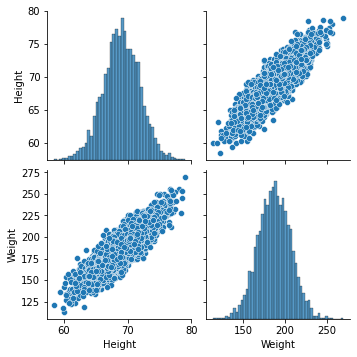

In [ ]:
sns.pairplot(Data)

In [ ]:
Data.columns

Index(['Height', 'Weight'], dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


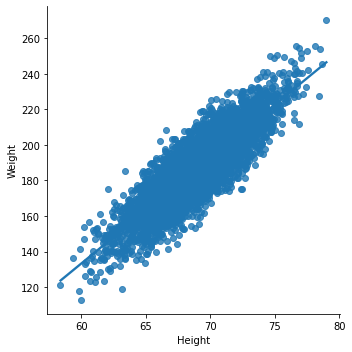

In [ ]:
sns.lmplot('Height','Weight',data=Data)

In [ ]:
#
from sklearn.preprocessing import StandardScaler
X_Data = Data[['Height']]
Y_Data = Data[['Weight']]

D = StandardScaler()
X = D.fit_transform(X_Data)
X

array([[-0.08505616],
       [ 1.77629158],
       [ 0.94517009],
       ...,
       [-0.70272536],
       [ 0.88464367],
       [ 0.46339739]])

In [ ]:
#build model
Y = D.fit_transform(Y_Data)
from sklearn.linear_model import LinearRegression
Model = LinearRegression()
Model.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
Model.coef_

array([[0.86295354]])

In [ ]:
Model.intercept_

array([3.12157211e-16])

In [ ]:
Model.score(X,Y)

0.74468881496416

In [ ]:
#split data test dan train
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train, Y_test = train_test_split(X,Y)
X_train.shape


(3749, 1)

In [ ]:
X_test.shape

(1250, 1)

In [ ]:
Y_train.shape

(3749, 1)

In [ ]:
Y_test.shape

(1250, 1)

In [ ]:
Lm = LinearRegression()

In [ ]:
Lm.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
Lm.score(X_train,Y_train)

0.7384651113106948

In [ ]:
New_predict = Lm.predict(X_test)
New_predict

array([[-0.07155332],
       [ 0.2100308 ],
       [-1.38721481],
       ...,
       [ 0.22888235],
       [ 0.54146355],
       [ 0.14957508]])

In [ ]:
Y_test

array([[ 0.00238532],
       [ 0.21259431],
       [-1.63759648],
       ...,
       [ 0.27464852],
       [ 0.89487448],
       [ 0.13648516]])

In [ ]:
#cek akurasi
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mean_squared_error(Y_test,New_predict)


0.23681936199975526

In [ ]:
mean_absolute_error(Y_test,New_predict)

0.3892764627997141

In [ ]:
r2_score(Y_test,New_predict)

0.7632739912404816